In [1]:
%pip install matplotlib
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Module

In [1]:
from importlib import reload
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '../src'))
import MLFunctions.MLRegressions as lg
reload(lg)

<module 'MLFunctions.MLRegressions' from 'c:\\Users\\cborg\\OneDrive - Microsoft\\40 - Persönlich\\Project Darwin\\MlmplementationsGIT\\ML-Regression\\examples\\../src\\MLFunctions\\MLRegressions.py'>

## Generate Demo Data and Plot it, if it is one or two dimensional

(<Axes3DSubplot:>, <Figure size 432x288 with 1 Axes>)

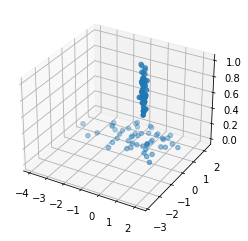

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

#Feature Dimensions
dimensions = 2
numberOfSamples = 100

X,Y = lg.getLogisticRegressionDemoData(numberOfSamples, dimensions)

lg.plotData(X,Y)


## Min Max Scaling of Data

(<Axes3DSubplot:>, <Figure size 432x288 with 1 Axes>)

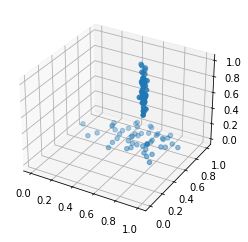

In [40]:
X = lg.scaleData(X)
Y = lg.scaleData(Y)

lg.plotData(X,Y)

## Run the Logistic Regression

In [43]:
learningRate = 0.1
iterations = 10000

weigths, c = lg.runLogisticRegression(X, Y, learningRate, iterations)

## Test Decission Boundary plot



0.91
[[ 2.21655369 -3.73118485]]
[0.65674948]
0.91


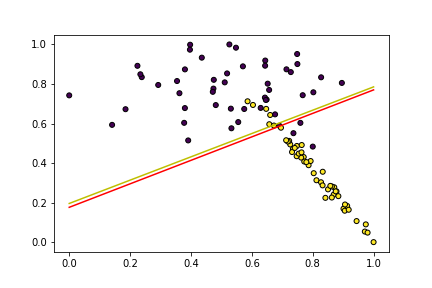

In [50]:
%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

plt.scatter(
    X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k"
    )

x1 = [min(X[:,0]), max(X[:,0])]
x1 = np.array(x1)
m = -weigths[0]/weigths[1]
cDB = -c/weigths[1]
x2 = m*x1 + cDB
plt.plot(x1, x2, 'y-')


import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd



xNP = np.array(X)
yNP = np.array(Y)

xNP = xNP.reshape(-1, 1)
yNP = yNP.reshape(-1, 1)

reg = LogisticRegression().fit(X, Y)
print(reg.score(X, Y))


print(reg.coef_)
print(reg.intercept_)

mSKLearn = -reg.coef_[0][0]/reg.coef_[0][1]
cDBSKLearn = -reg.intercept_/reg.coef_[0][1]
x2SKLearn = mSKLearn*x1 + cDBSKLearn


n = len(X)
dimensions = X.shape[1]

YPredClass = []

for i in range(0, n):
    currentValue = 0
    for dim in range(0, dimensions):
        currentValue = currentValue + X[i][dim] * weigths[dim]
    currentValue += c

    if currentValue > 0.5:
        YPredClass.append(1)
    else:
        YPredClass.append(0)
        

acc_score = accuracy_score(Y, YPredClass, normalize = True)
print(acc_score)

plt.plot(x1, x2SKLearn, 'r-')
plt.show()



## Test Results

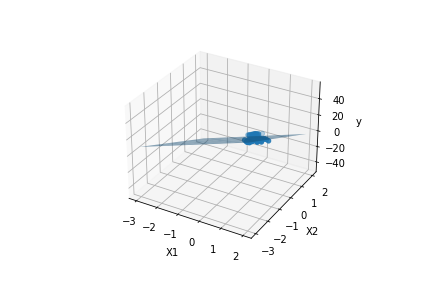

In [49]:
%matplotlib widget
lg.plotResults(X, Y, weigths, c)

## Predict data with the trained classifier

In [50]:
n = len(X)
dimensions = X.shape[1]

YPredClass = []

for i in range(0, n):
    currentValue = 0
    for dim in range(0, dimensions):
        currentValue = currentValue + X[i][dim] * weigths[dim]
    currentValue += c

    if currentValue > 0.5:
        YPredClass.append(1)
    else:
        YPredClass.append(0)
        

## Evaluate Confusion Matrix

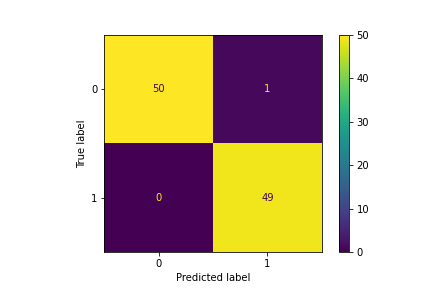

In [51]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(Y, YPredClass)

cm_display = ConfusionMatrixDisplay(confMatrix).plot(values_format='d')